# Analysis of condtions present in patients who suffered from Heart Failure

Jai Prathap Gomathi Veerakumar(mm21jpgv@leeds.ac.uk)

Viswavaageesh Chandarmouli(mm21vc@leeds.ac.uk)

Supriya Nallan Chakravarthula(mm21snc@leeds.ac.uk)


## Project Plan




## The Data (10 marks)


The data is originally from Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015 and is sourced from Kaggle (https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) which is an open-source data platform. The data contains annonymised clinical information of patients who have suffered from heart failure. The variables present in the dataset are explained with respect to their respective data type:


1. age (float) :                                                                                                                       age of patients who suffered from                                                                                     Heart failure                          
2. anaemia (categorical-binary):           a value of  '1' indicates the patient                                                                                      is anaemic(i.e has a low red blood                                                                                      cell count) and '0' indicates otherwise

3. creatinine_phosphokinase (int): levels of CPK enzyme( a protien which is present in the heart) in mcg/L (microgram per litre). Higher levels usually indicatae stress to the heart. 

4.  diabetes (categorical-binary):   a value of  '1' indicates the patient                                                                                      is has diabetes and '0' indicates otherwise

5. ejection_fraction (int): tells us the percentage of blood the heart pumps at each contraction(usually less than 70%)

6. high_blood_pressure(Categorical-binary): a value of  '1' indicates the patient has high BP and '0' indicates otherwise

7. platelets (int): count of platelets in the blood (kiloplatelets/mL)

8. serum_creatinine (int): amount of creatine in the blood stream(mg/dL). Higher levels signal poor kidney function. Normal range is between 0.6 and 1.3 mg/dL

9. serum_sodium (int):  sodium levels(mEq/L) in the blood stream             

10. sex (categorical-binary): '0' indicates female and '1' indicates male                     

11. smoking (categorical-binary): '0' indicate 'non-smokers' and '1' indicates 'smokers'      

12. DEATH_EVENT (categorical-binary):encodes whether the patient died (1) or whether they were censored (0). Censoring means that the scientists lost contact with the patient

## Project Aim and Objectives (5 marks)

This project aims to analyse the deaths caused by heart failure and the medical conditions associated with it. Heart failure is a common cause of death worldwide. It is usually because of the heart's inefficiency to pump sufficient blood into the bloodstream for the body to function normally. Heart failure does not necessarily cause deaths. But in the company of other existing conditions such as high blood pressure and anaemia, increased creatine and sodium levels in the bloodstream,  abnormal platelet count and ejection fraction, and existing habits like smoking, it may be fatal. It is unclear which one (or) combination of these conditions cause death to a patient who has had heart failure. Although these conditions may be thwarted by having a healthy diet, there are uncontrollable factors such as age and gender of a person which may have an effect. 

This project aims to address three common questions that arise regarding deaths caused by heart failure.   



Objective 1: Does gender play a role in the deaths caused by heart failure?
It is unclear whether a person's 'sex' makes them more/less susceptible to death by heart failure. This objective aims to exhume the truth behind this. 

Objective 2: What condition was most prevalent in women who died of heart failure?  
his objective aims to uncover some common underlying conditions in women who had died from heart failure. It is vital to know these conditions as it makes women aware of the danger caused by these conditions and helps them take steps to prevent them. 
 
Objective 3: Does smoking have an effect on deaths caused by heart failure?
Don't we all want to know this? We all know smoking is the cause of several diseases but this objective is to address all rumours going around accusing smoking as key to deaths. Is this true?

Let's find out!

## System Design (5 marks)

### Architecture

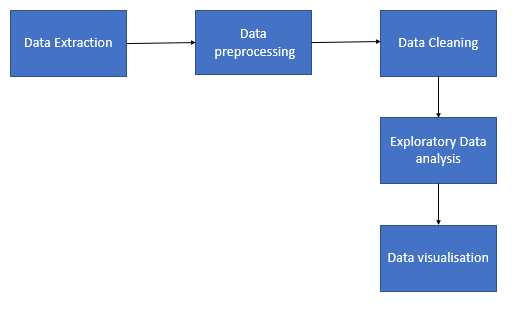

Data of patients who have had heart failure is obtained from Kaggle(an open-source platform) as CSV (comma-separated values). The second step is data preprocessing: the CSV file is transformed into a structured data frame using the pandas( a library in python). The data is checked for missing values, ambiguous variables and possible outliers identified through comparisons with results published in medical journals and articles. This cleaned data is then ready for analysis. The data is now analysed carefully in search of answers to the objectives we have created. To effectively communicate the findings, the obtained results are visualised through python visualisation libraries in Seaborn and Matplotlib. 

### Processing Modules and Algorithms

1. Removing Outliers based on Inter-quantile range and through comparison of variable values with medical papers. 
2. Finding correlation of each variable with death
4. Splitting and creatiag new data frames from existing dataframes   
3. Exploratory Data analysis 

## Program Code (15 marks)

In [51]:
# importing all the necessary packages that will be used in the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
# reading the data into a data frame
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [53]:
# looking at the dataframe's head
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Not enough information is provided about the variable 'Time'. To avoid ambiguity, it is removed.  

In [54]:
# column time is removed from the dataframe
df.drop('time',axis=1, inplace=True)

In [55]:
# Code to check if the data types of variabels 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [56]:
# Finding the sum of all NaN values in columns check for missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

There are no Null values, we are good to go. 

In [57]:
# Checking the distribution of each varible to evaluate further for possibe outliers
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


Creatinine phosphokinase, Ejection fraction, Serum_creatinine and Platelets seem to have a lot of outliers given the differnce betweeen
maximum value and the 75th percentile value of the variable. 

It is now time to look how each variable is divided to check for outliers

## Removing Outliers

### Let us start with Serum Creatinine

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

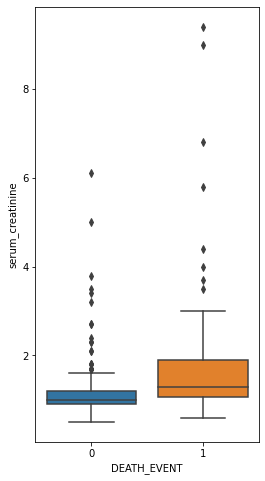

In [58]:
# Plotting a Box plot of the levels of Serum Creatinine between people who were censored and those died from heart filure

plt.figure(figsize=(4,8))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine')

The normal range of serum ceratine accourding to https://doi.org/10.1100/2012/186495 is between  0.6 and 1.3 mg/dL. 

The box plot shows a lot of outliers in Serum Creatinine. Let us remove all those values above 90% and more than 1.5 times the 75th percentile. 

serum_creatinine levels are higher for those who die from Heart Failure

In [59]:
# Code to get the 90th percentile value of Serum Creatinine

np.percentile(df['serum_creatinine'],90)

2.1

In [60]:
# Outliers are value of Serum Creatinine above 1.5 times the 75th percentile value of Serum Creatinine
# This Code outputs 1.5* 75th percentile value of Serum Creatinine

1.5*np.percentile(df['serum_creatinine'],75)

2.0999999999999996

Ouliers are found to be values of Serum Creatinine above the 2.1 mark

In [61]:
# Removing ouliers from of Serum Creatinine from the data frame

df=df[df['serum_creatinine']<2.1]

Now, let us look at how the serum creatinine varies now

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

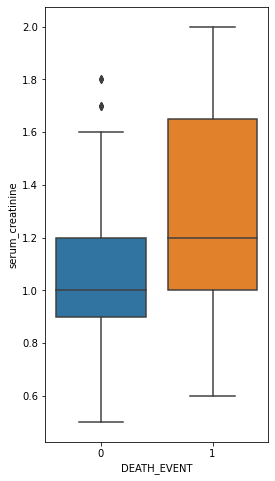

In [62]:
# Plotting a Box plot of the levels of Serum Creatinine between people who were censored and those died from heart filure 
# after removing outliers

plt.figure(figsize=(4,8))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine')

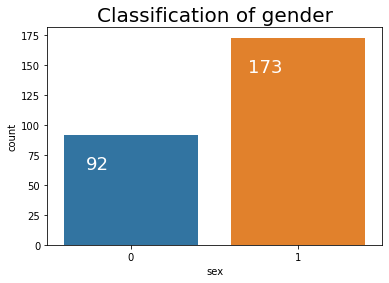

In [63]:
# Code to visualise the distribution of Gender 

ax=sns.countplot(data=df, x='sex')
ax.set_title('Classification of gender', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),
                ha='center', va='top', color='white', size=18)
plt.show()

#### Men are twice as much as Women. This dataset is thus more biased towards men. 

### Now, let us move on to Ejection Fraction

In [64]:
# finding the unique values of ejection fraction 

df['ejection_fraction'].unique()

array([20, 38, 15, 60, 65, 25, 30, 50, 14, 55, 35, 40, 45, 80, 17, 62],
      dtype=int64)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

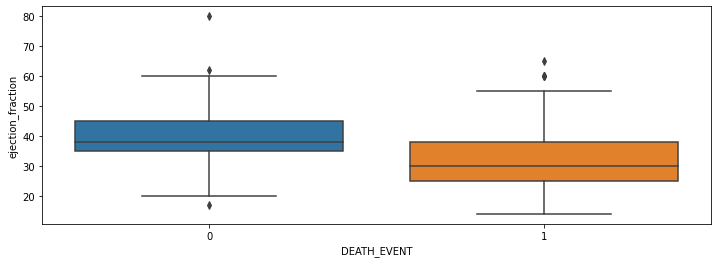

In [65]:
# Plotting a Box plot of ejection fraction between people who were censored and those died from heart filure 

plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction')

 Ejection fraction, which is the percentage of blood leaving the heart from a contraction, is higher in healthy patients than in unhealthy patients. Reviewing the  https://doi.org/10.1093/oxfordjournals.eurheartj.a061916, the normal range is 52.3±6.2%. This one super-efficient heart is pumping out 80% of the blood, which is much higher than even the 95-percentile value of %. Let's remove this outlier.

In [66]:
# Removing outliers based on the medical joural. 

df=df[df['ejection_fraction']<70]

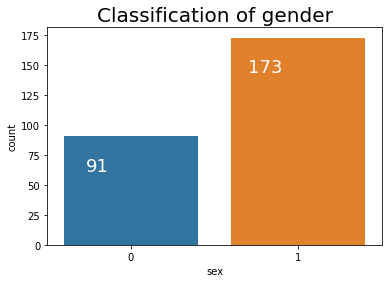

In [67]:
# Code to visualise the distribution of Gender after reomving ejection fraaction ouliers  

ax=sns.countplot(data=df, x='sex')
ax.set_title('Classification of gender', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),
                ha='center', va='top', color='white', size=18)
plt.show()

Not a big change is seen as there was only one outlier

### Now, lets dig deep into Platelets

In [68]:
# This Code outputs 90th percentile value of Platelets

np.percentile(df['platelets'],90)

380500.0000000001

In [69]:
# Outliers are value of Serum Creatinine above 1.5 times the 75th percentile value of Platelets
# This Code outputs 1.5* 75th percentile value of platelets

1.5*np.percentile(df['platelets'],75)

453375.0

 The normal laboratory reference range for platelets is 150–450k/mL according to https://cks.nice.org.uk/topics/platelets-abnormal-counts-cancer/references/ but can go upto 1000k/ mL for some people. Thus these CANNOT be considered outliers

### Finally, let us move on to Creatinine Phosphokinase

In [70]:
# This Code outputs 90th percentile value of Creatinine hosphokinase

np.percentile(df['creatinine_phosphokinase'],90)

1208.3000000000002

In [71]:
# This Code outputs 1.5* 75th percentile value of platelets

np.percentile(df['creatinine_phosphokinase'],75)

582.0

According to https://www.hindawi.com/journals/crim/2015/769576/, the values for CPK enzymes can go upto 12000 mcg/L and thus these values are not outliers

## EDA

###### Let us now look at how the variables are correlated to DEATH_EVENT

In [72]:
# code to find the correlation of each variable with DEATH_EVENT

df.corr()['DEATH_EVENT'].drop('DEATH_EVENT').sort_values()

ejection_fraction          -0.296759
serum_sodium               -0.149458
platelets                  -0.029839
diabetes                   -0.013905
smoking                     0.005076
sex                         0.032734
high_blood_pressure         0.057806
anaemia                     0.073340
creatinine_phosphokinase    0.082591
age                         0.253315
serum_creatinine            0.361059
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:>

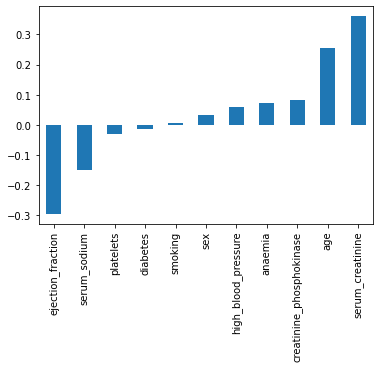

In [73]:
# Visualising the correlation of each variable with DEATH_EVENT

df.corr()['DEATH_EVENT'].drop('DEATH_EVENT').sort_values().plot(kind='bar')

##### We can clearly see that Serum Creatinine, Age, serum_sodium and Ejection Fraction affect the death. To get a even clear understanding of how much correlation is present, let us numerically find the correlation of the features with Death. 

In [74]:
#correlation of sex with other values
df.corr()['sex'].drop('sex').sort_values()

diabetes                   -0.151488
ejection_fraction          -0.120534
anaemia                    -0.118301
platelets                  -0.110980
high_blood_pressure        -0.109829
serum_sodium               -0.025664
DEATH_EVENT                 0.032734
age                         0.037759
serum_creatinine            0.082855
creatinine_phosphokinase    0.101501
smoking                     0.457609
Name: sex, dtype: float64

Only smoking is highly correlated with sex

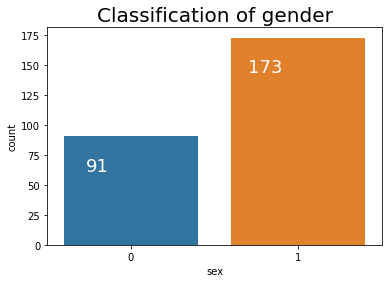

In [75]:
# Code to visualise the distribution of Gender after reomving all ouliers  

ax=sns.countplot(data=df, x='sex')
ax.set_title('Classification of gender', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),
                ha='center', va='top', color='white', size=18)
plt.show()

#### For unbiased analysis, the data is now classified into Male and female dataframes to perform the analysis of whether Gender plays a role by finding out the percentages of deaths in each data frame

In [76]:
dff=df[df['sex']==0] # dataframe of females
dfm=df[df['sex']==1] # dataframe of males

dfd=df[df['DEATH_EVENT']==1] # Dataframe containing only the people who died
dffd=dff[dff['DEATH_EVENT']==1] #Dataframe containing only the females who died
dfmd=dfm[dfm['DEATH_EVENT']==1] #Dataframe containing only the males who died

In [77]:
 # Percentage of females who died due to heart failure to the total number of females  
females= (dffd['DEATH_EVENT']==1).count()/dff['DEATH_EVENT'].count()*100
(dffd['DEATH_EVENT']==1).count()/dff['DEATH_EVENT'].count()*100

26.373626373626376

In [78]:
 # Percentage of males who died due to heart failure to the total number of females  
males=(dfmd['DEATH_EVENT']==1).count()/dfm['DEATH_EVENT'].count()*100
(dfmd['DEATH_EVENT']==1).count()/dfm['DEATH_EVENT'].count()*100

29.47976878612717

In [79]:
# Visualisation of gender as a bar plot
def variation_of_gender_with():
    
    # casting percentage of males and females in a dictionary
    dict_of_gender = { 'Female': females, 'Male':males } 
    keys = list(dict_of_gender.keys())
    values = list(dict_of_gender.values())
    ax= sns.barplot(x=keys, y=values)
    ax.set_title('Chances of death from heart failure', fontsize=20)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height().round(2)}', (p.get_x()+0.2, p.get_height()),
                    ha='center', va='top', color='white', size=18)
    plt.show()


## 2. What condition was most prevalent  in women who died of heart failure ?

### Let us first start with females with high blood pressure

In [80]:
 #dataframe of females with high blood pressure who had died 
dffh=dffd[(dffd['high_blood_pressure']==1)]


In [81]:
# Percentage of females with high blood pressure who had died 
f_with_high_bp= dffh['sex'].count()/dffd['sex'].count()*100
dffh['sex'].count()/dffd['sex'].count()*100

54.166666666666664

#### A massive 54% of women with prevailing High-blood pressure had died. 

### Now,  Let us move onto females who suffer from Diabetes

In [82]:
#dataframe of females with diabetes who had died 
dffs=dffd[(dffd['diabetes']==1)]


In [83]:
# Percentage of females with diabetes who had died 
f_with_diabetes=dffs['sex'].count()/dffd['sex'].count()*100
dffs['sex'].count()/dffd['sex'].count()*100

54.166666666666664

#### Surprisingly, female patients who had prevailing diabetes have the same mortality rate as female patients who had high blood pressure with 54%

### Females with Anaemia are now our focus

In [84]:
#dataframe of females with Anaemia who had died 
dffa=dffd[(dffd['anaemia']==1)]

In [85]:
# Percentage of females with Anaemia who had died 
females_with_anaemia=dffa['sex'].count()/dff['sex'].count()*100
dffa['sex'].count()/dff['sex'].count()*100


17.582417582417584

#### Only 17.5% of amaemic patients died from heart failure

### It is now time to move onto analysing about Serum Creatinine which gives us a measure of out Kidney's functioning

In [86]:
#dataframe of females with more than normal levels of Serum Creatinine 
dffsc=(dffd[dffd['serum_creatinine']>=1.3])


In [87]:
# Percentage of females with more than normal levels of Serum Creatinine 
# NOT in the normal range of 0.6-1.3
f_with_serum=dffsc['serum_creatinine'].count()/(dffd['serum_creatinine'].count())*100
dffsc['serum_creatinine'].count()/(dffd['serum_creatinine'].count())*100

50.0

#### Almost half of the females who had Abnormal levels of Serum Creatinine as per https://doi.org/10.1100/2012/186495 died from Heart failure

### Let us shift out focus to females with abnormal platelet count

In [88]:
#dataframe of females with abnormal Platelet count
dffp=(dffd[(dffd['platelets']>=450000)|(dffd['platelets']<=150000)])

In [89]:
# Percentage of females with with abnormal Platelet count
f_with_platelets=dffp['platelets'].count()/(dffd['platelets'].count())*100
dffp['platelets'].count()/(dffd['platelets'].count())*100

16.666666666666664

#### 16% of females with abnormal platelet count as per  https://cks.nice.org.uk/topics/platelets-abnormal-counts-cancer/references/ died from heart failure 

### It is now time to analyse females with poor Ejection Fraction

In [90]:
#dataframe of females with abnormal Ejection Fraction
dffe=(dffd[(dffd['ejection_fraction']>=60)|(dffd['ejection_fraction']<45)])

In [91]:
# Percentage of females with with abnormal Ejection Fraction 
f_with_ejection=dffe['ejection_fraction'].count()/(dffd['platelets'].count())*100
dffe['ejection_fraction'].count()/(dffd['platelets'].count())*100

83.33333333333334

#### As we guessed from the definition of ejection fraction,it plays the most vital role in heart failure.  

### Finally, we get to analyse about females with abnormal Serum Sodium levels

In [92]:
#dataframe of females with abnormal Serum Sodium
dffss=(dffd[(dffd['serum_sodium']>=145)|(dffd['serum_sodium']<135)])

In [93]:
# Percentage of females with Serum Sodium
f_with_sodium=dffss['serum_sodium'].count()/(dffd['serum_sodium'].count())*100
dffss['serum_sodium'].count()/(dffd['serum_sodium'].count())*100

37.5

### 37.5% of females with abnormal Serum Sodium levels as per https://journals.lww.com/nursing/Abstract/2007/12000/How_to_respond_to_abnormal_serum_sodium_levels.46.aspx#:~:text=Hypernatremia%2C%20less%20common%20than%20hyponatremia,mEq%2FL%20can%20be%20fatal die from heart failures

In [94]:
def cause_of_deaths_in_women():
    
    #Creating a dictionary to store values of females with abnormal conditions
    prevalent_dis= {'Anemia': females_with_anaemia.round(), 
                    'Diabetes': f_with_diabetes.round(), 
                    'Platelet': f_with_platelets.round(),
                    'High BP': f_with_high_bp.round(),
                    'SC': f_with_serum.round(),#Serum Creatinine
                    'EF':f_with_ejection.round(), #Ejection Fraction
                    'Sodium':f_with_sodium.round(),#Serum Sodium
                   }
    # The folllowing code is used to create a bar plot to visualise 
    # the effects of existing conditions causing death to women
    # with Heart failure

    names = list(prevalent_dis.keys()) # creating a list of all the keys from the prevalent diseases dictionary 
    values = list(prevalent_dis.values()) # creating a list of all the values from the prevalent diseases dictionary 

    ax1=sns.barplot(x=names, y=values) # storing the bar plot in a new varible 

    ax1.set_title('Classification of abnormal conditions leading to deaths', fontsize=20)
    for p in ax1.patches:
        ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=15)

    plt.figure(figsize=(16,16))
    plt.tight_layout()
    plt.show()

    
    
    


### From the bar chart above, Ejection Fraction plays the most important role in causing deaths amongst female with Heart Failure. Next comes, Diabetes anad High BP, responsible for 54% of deaths in female because of Heart failure.

## 3. Who is more prone to deaths caused by heart failure: Smokers or Non-Smokers?

In [95]:
# Number of smokers who had died from Heart Failure
smokers= df[(df['smoking']==1)&(df['DEATH_EVENT']==1)].count()/(df[(df['smoking']==1)&(df['DEATH_EVENT']==1)].count()+
                                                                df[(df['smoking']==1)&(df['DEATH_EVENT']==0)].count())
no_of_somkers= smokers['DEATH_EVENT']*100

In [96]:
# Number of non-smokers who had died from Heart Failure
nonsmokers= df[(df['smoking']==0)&(df['DEATH_EVENT']==1)].count()/(df[(df['smoking']==0)&(df['DEATH_EVENT']==1)].count()+
                                                                   df[(df['smoking']==0)&(df['DEATH_EVENT']==0)].count())
no_of_nonsomkers= nonsmokers['DEATH_EVENT']*100
no_of_nonsomkers

28.24858757062147

In [97]:
def does_smoking_affect_death():
    #Creating a dictionary to store values of smokers and non-smokers
    smoker_dis= {'Smokers': no_of_somkers.round(), 'Non-smokers': no_of_nonsomkers.round()}

    # The folllowing code is used to create a bar plot to visualise 
    # the effects of smoking in causing deaths to 
    # people with Heart failure
    names = list(smoker_dis.keys())
    values = list(smoker_dis.values())

    ax2=sns.barplot(x=names, y=values)

    ax2.set_title('Classification of abnormal conditions leading to deaths', fontsize=20)
    for p in ax2.patches:
        ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),
                     ha='left', va='top', color='white', size=15)

    plt.figure(figsize=(16,16))
    plt.tight_layout()
    plt.show()

### Great news to all the smokers!! 
### People who don't smoke are as likely as people who do to die from heart failure

## Project Outcome (10 + 10 marks)

## Overview of Results


The results obtained were surprising and obvious. From what was taught in school, men are 
supposed to have better cardiovascular strength than women because of their high-testosterone levels but the results
obtained does not back that. The correlation value of gender with death tells us otherwise. Further analysis did not aid the intuition either. Because of the small size of the data set, it is concluded that both men and women are equally prone. The results for the second objective were quite obvious. Ejection fraction is a value calculated by the rate at which the heart pumps out blood. It is commonsense that abnormal ejection fraction would be the most prevalent condition in women(here). The aim of the final objective was a long-standing question amongst all of us is good news, to smokers, of course. Deaths due to heart failure is independent of the smoking habits in a person. Overall, the analysis has answered all the objectives but cannot be taken to be the blind truth considering the small size of the data set.

### Objective 1


### 1. Does gender play a role in the deaths caused by heart failure?


#### Explanation of Results

Men are as likely to die from heart failure as women neglecting the 3% difference considering the dataset's size. The answer obtained is unbiased as the analysis performed is on separate male and female datasets. Our first glance at the data revealed that the dataset is biased towards males. The number of females was only half as much as the number of males. This bias made us separate the data sets.  It was clear that any results we obtain from this dataset will not be accurate and will be leaning towards more deaths to males because of their large numbers. The gender datasets were further divided into deaths and non-deaths as we needed the count of non-deaths to deaths in each gender.  This analysis considers gender as an independent criterion without any correlation to other deadly conditions. The only correlated variable with 'sex' was 'smoking' which is not fatal(spoiler alert!) with any prevailing conditions with gender is not considered. The independent analysis concludes that men and women are equally probable to die from heart failure. 


### Visualisation

The following bar chart shows the probability of deaths from heart failure based on gender  

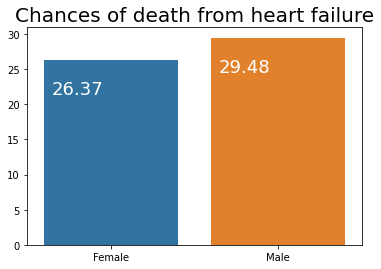

In [98]:
variation_of_gender_with()

### 2. What condition was most prevalent in women who died of heart failure ?


#### Explanation of Results

Abnormal Ejection ratio(the percentage rate at which the heart pumps out blood) is the leading cause with a massive 83% chance of death when women have heart failure. This value is indicative of the performance of the heart and thus the results are obvious. The presence of diabetes, High blood pressure and abnormal Serum Creatinine increase the chances of death by more than half (exactly half for abnormal levels of Serum Creatine). This result is quite fascinating as two of the three conditions affect the bloodstream. Diabetes indicates high blood sugar level, high blood pressure, as the name suggests, indicates high pressure on the artery walls whose final destination is, wait for it, ..., yes, the heart. Serum creatine on the other hand gives information on the functioning of the kidney. A person with increased sodium levels(increased Serum Sodium) in the bloodstream has a 38% chance of death when he/she suffers from heart failure. The least fatal, yet fatal conditions are when a person is anaemic or has an abnormal platelet count( usual platelet count is between 150k and 450k) with about 17% leading to deaths. The common feature among all the conditions is the effect these conditions have on the bloodstream. It is indicative of the increasing stress the heart bears to pump blood. 



### Visualisation

The following bar chart shows us by how each condition increases the chances of death in women

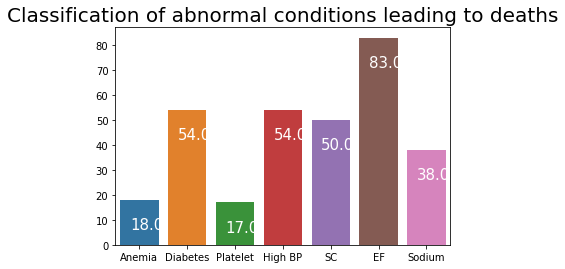

<Figure size 1152x1152 with 0 Axes>

In [99]:
cause_of_deaths_in_women()

### 3. Who is more prone to deaths caused by heart failure: Smokers or Non-Smokers?


#### Explanation of Results




Smoking is one of the most deadly habit in the world with about 1.1 billion smokers as of 20119. It is the reason behind 78,000 deaths in the UK every year. It can be deadly in existence with other conditions. This objective's aims is to learn whether smoking can cause deaths due to heart failure. The answer to this is 'NO'. Yes, smokers and non-smokers are equally susceptible to death by heart failure. The answer obtained is unbiased as smokers and non-smokers have separate data sets.The percentage split of liklihood of death from heart failure is 29% to 28% in favour of smokers, which in the big picture is absolutely nothing. Although smoking may cause a lot of other health related problems, it does not not an effect on deaths. 

### Visualisation

The bar chart below clearly shows that smoking has no effect on the deaths caused by heart failure

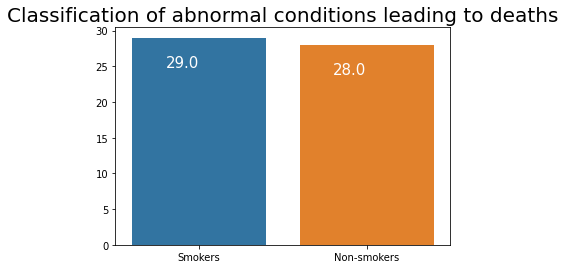

<Figure size 1152x1152 with 0 Axes>

In [100]:
does_smoking_affect_death()

## Conclusion (5 marks)

### Achievements

The results obtained from the analysis answers a lot of questions. Our intuitions regarding 'Men' as having superior cardiovascular strength was put to bed when we found out that both genders do not affect death. The conditions which proved to be most fatal to women were associated with the heart as we guessed. It was no surprise that as the blood thickens, the heart feels increasing stress and as a result, the prevalence of conditions affecting the bloodstream increases the chance of death when the patient has heart failure. The most surprising result was when we found out smoking does not expedite deaths. This was by far the star of the analysis and comes to our shock that not all bad habits cause deaths. Good news for 1.1 billion people indeed. 

### Limitations

There were several limitations to this project:
1. The dataset contains values of only 299 patients which has been reduced to 264 after removing the outliers. This is not enough to make any conclusive decisions and thus the results obtained here cannot be extrapolated
2. The outliers removed have been based on published medical journals. It is impossible to know if a patient in reality can have those values. 
3. The analysis on women were only made on 91 women which is a low number in order for the results to be generalisd
4. Lastly, the data was obtained from a specific geographic location(Faisalabad, Pakistan). Unless we have eclectic data from different locations, the results can't be trusted as the conditons may/may not be fatal in that location  

### Future Work

In future, we would like to obtain data from a vast set of countries to make sure the findings can hold valid. We also have not considered the effect of multiple conditions in deaths as it is impossible to manually find the effect of each combination on death without modelling the data. 

# THANK YOU!!!!